Objective: Dimensionality Reduction using PCA 

Author: Jason Wong

Conduct  a  Principal  Component  Analysis  to  investigate  if  you  can  reduce  the  dimension  of  the 
chemical data set used for assignment #1 without impacting the model's accuracy.


# Write a Python program(s) to create the following based on the steps specified on slide #23: 

(a)  Covariance matrix 

(b) Eigenvectors and eigenvalues 

(c)  Projection matrix 

(d) Component matrix and coefficients (loadings) of each PC 

(e)  Explained variance for each PC 

(f)  Correlation matrix between the data set and PC scores 

In [1]:
import pandas as pd
data = pd.read_csv("https://gist.githubusercontent.com/jaasonw/d00e9782bf6de5ec1b1ec305790eeb88/raw/b8028c4471f547809581c24c31a8f31940c02268/air.csv")
data

,T,P,TC,SV,Idx
0,253.15,17.7,0.026827,389.355242,54.102967
1,253.15,17.7,0.026970,388.007160,54.162740
2,253.15,17.7,0.026912,385.677846,54.232917
3,253.15,17.7,0.026815,384.292031,54.304434
4,253.15,17.7,0.026731,392.060606,54.070973
...,...,...,...,...,...
419995,353.15,300.0,0.041824,435.341910,53.755453
419996,353.15,300.0,0.041518,426.840370,54.234870
419997,353.15,300.0,0.041744,428.069807,54.106685
419998,353.15,300.0,0.041607,430.308699,53.970731


## Step 1: Standardize the dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_std = pd.DataFrame(scaler.transform(data))
data_std.columns = data.columns

# Split test and training data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,4], test_size=0.40, random_state=42)

data_std

,T,P,TC,SV,Idx
0,-1.46385,-1.085147,-1.932988,-1.148942,0.518523
1,-1.46385,-1.085147,-1.897869,-1.208770,0.755887
2,-1.46385,-1.085147,-1.912251,-1.312146,1.034562
3,-1.46385,-1.085147,-1.935958,-1.373649,1.318563
4,-1.46385,-1.085147,-1.956603,-1.028877,0.391472
...,...,...,...,...,...
419995,1.46385,1.877493,1.751194,0.891960,-0.861483
419996,1.46385,1.877493,1.675923,0.514659,1.042318
419997,1.46385,1.877493,1.731570,0.569222,0.533287
419998,1.46385,1.877493,1.697805,0.668584,-0.006598


## Step 2: Create the covariance matrix

In [3]:
data_cov = X_train.cov()

## Step 3: Create Eigenpairs

In [4]:
import numpy as np
from numpy.linalg import svd
from numpy.linalg import eig

# Step 2.5 compute the eigenvectors and eigenvalues of the covariance matrix
e_vals, e_vecs = eig(data_cov)

# Order by largest eigenvalue
idx = e_vals.argsort()[::-1]   
e_vals = e_vals[idx]
e_vecs = e_vecs[:,idx]

np.set_printoptions(precision=3)
print("Eigenvalues:")
print(e_vals)
print("Eigenvectors:")
print(e_vecs)

Eigenvalues:
[9.123e+03 1.617e+03 9.227e+00 1.095e-06]
Eigenvectors:
[[ 6.121e-03  8.490e-01  5.284e-01  1.058e-04]
 [-9.970e-01  4.564e-02 -6.179e-02  1.442e-05]
 [-1.342e-05  9.258e-05  5.154e-05 -1.000e+00]
 [ 7.657e-02  5.264e-01 -8.468e-01  4.061e-06]]


## Step 4: Create component matrix and loadings

In [5]:
pca_train = np.matmul(X_train, e_vecs)
pca_train.columns = [f"PCA{n + 1}" for n in range(4)]
pca_train

,PCA1,PCA2,PCA3,PCA4
119749,6.489258,536.569502,-193.885549,-0.000310
58136,19.603115,541.852816,-202.527218,-0.000741
113887,7.093904,540.726131,-200.571825,-0.000661
343026,-164.668356,516.778799,-197.954617,0.001785
92282,5.121129,494.887397,-202.598212,0.000566
...,...,...,...,...
259178,-117.373042,448.503695,-202.352559,0.000404
365838,-269.377421,422.385363,-196.475688,-0.004981
131932,-17.179169,447.303669,-201.585066,0.001501
146867,-16.615990,467.313698,-195.891965,0.001448


In [18]:
# Use SVD method for test dataset
u, s, vh = np.linalg.svd(X_test, full_matrices=False)
pca_test = pd.DataFrame(np.matmul(u, np.diag(s)))
pca_test.columns = [f"PCA{n + 1}" for n in range(4)]
pca_test

,PCA1,PCA2,PCA3,PCA4
0,-524.623021,-95.210705,-0.653700,0.000159
1,-505.467915,186.589114,20.008772,0.005382
2,-559.154948,-102.811536,-24.443158,0.000881
3,-522.477307,28.606228,5.022178,-0.000503
4,-577.422137,-35.279988,-21.013187,0.000635
...,...,...,...,...
167995,-502.171399,-90.050022,7.366962,-0.000637
167996,-530.137719,180.846572,13.645256,-0.001000
167997,-506.267760,186.379304,20.606315,0.003982
167998,-506.339266,186.360547,20.659735,0.004636


## Step 5: Calculate the explained variances

After detemining the Principal Components, to compute the percentage of information accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues.

In [46]:
# explained_variances = [(e_vals[i] , np.sum(x_pca[:,i])) for i, v in enumerate(e_vals)]
explained_variances = [e_vals[i] / sum(e_vals) for i, v in enumerate(e_vals)]
explained_variances

[0.8486981115390654,
 0.15044352221652765,
 0.0008583661425364786,
 1.018705347956594e-10]

Create a scree plot to display the variances

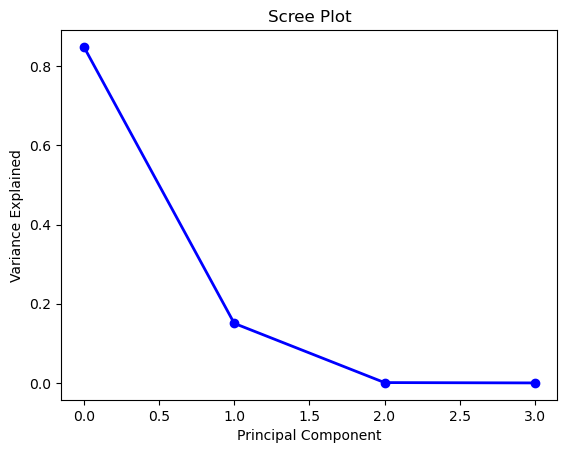

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(0,len(e_vals)), explained_variances, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Determine if a feature or features can be removed from the data set based on the following criteria: 
(a)  Explained variance >80% 

(b) Kaiser criteria 

(c)  Correlation r>0.5 from the correlation matrix 
 
 
 
Which feature(s) meet all the above criteria?

Which features can be removed from the data set? Justify your decision. Are those features 
removed the same features removed by LASSO regression? If they are different, explain 
possible reasons.

In [21]:
# Determine the eiganvalues satisfying the kaiser criterion

kaiser = [k for k in e_vals if k >= np.mean(e_vals)]
kaiser = pd.DataFrame(kaiser)
kaiser

,0
0,9123.220264


Based on the above criteria, we should remove PCA2 - PCA4

## Compare with LASSO feature selection

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipeline = Pipeline([ ('scaler',StandardScaler()), ('model',Lasso()) ])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,10,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",
                      # verbose=3
                     )
search.fit(X_train,y_train)
search.best_params_

{'model__alpha': 0.01}

In [40]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([0.405, 0.126, 0.   , 0.442])

In [41]:
np.array(data_std.iloc[:,0:4].columns)[importance > 0]

array(['T', 'P', 'SV'], dtype=object)

LASSO regression would tell us to remove TC. PCA would tell us that the first principal component accounts for 84% of the data but since PCA projects our dataset into an arbitrary PCA dimension, it is not possible to determine what features are represented by each principal component

# Compare the models created by the Least Square method with the new data set with only selected features by PCA and the original data set in terms of training and testing errors. Is there any difference in accuracy? 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# k fold cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform a linear regression on the original dataset
original_data_reg = LinearRegression().fit(X_train, y_train)
original_data_score_train = -1 * cross_val_score(original_data_reg, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
original_data_score_test = mean_squared_error(y_test, original_data_reg.predict(X_test), squared=False)

In [66]:
# Perform a linear regression on the PCA dataset, using only PC1

pca_reg = LinearRegression().fit(np.array(pca_train["PCA1"]).reshape(-1, 1), y_train)
pca_score_train = -1 * cross_val_score(pca_reg, np.array(pca_train["PCA1"]).reshape(-1, 1), y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
pca_score_test = mean_squared_error(y_test, pca_reg.predict(np.array(pca_test["PCA1"]).reshape(-1, 1)), squared=False)

In [67]:
pd.DataFrame([
    ["Linear Regression", original_data_score_train, original_data_score_test],
    ["PCA", pca_score_train, pca_score_test],
],  columns=['', 'RMSE (Training)', 'RMSE (Test)']).set_index("")

,RMSE (Training),RMSE (Test)
,,
Linear Regression,0.136458,0.136112
PCA,0.251969,0.251628


Compared to the least squares method, PCA performs slightly worse in this case.